In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import glob, operator, time, itertools, gzip, json, requests, datetime, os, struct
import pandas as pd
from scipy.stats import pearsonr
from collections import Counter
from multiprocessing import Pool
import matplotlib.dates as md
import datetime as dt
import pytz

from IPython.display import display
%matplotlib inline
#pd.set_option('display.max_columns', 100)
plt.style.use('classic')

In [3]:
'''
"missing", "readrates", "mdscpu", "timestamps", "osscpu", "writerates", "metadata"
"scratch2", "scratch3", "scratch1", "cscratch"
'''
def get_lmt(start, end, fs, record):
    print("start get %s data of %s from %s to %s" % (\
        record, fs, pd.datetime.utcfromtimestamp(start), pd.datetime.utcfromtimestamp(end)))
    url = "http://app.pytokio.dev-cattle.stable.spin.nersc.org:8081/hdf5/%s/%s?start=%d&end=%d" % (fs,
          record, start, end, )
    r = requests.get(url, headers={'accept': 'application/json'}).json()
    if r.get('message') is not None: print(r['message'])
    return r


In [311]:
start1 = 1532994764
ts1 = start1 - 18000
end1 = 1532587760
te1 = end1 + 18000
duration1 = te1 - ts1
# te = ts + 1800
ost_wr1 = get_lmt(ts1, te1, 'cscratch', 'writerates')
ost_rr1 = get_lmt(ts1, te1, 'cscratch', 'readrates')
ost_cpu1 = get_lmt(ts1, te1, 'cscratch', 'osscpu')
mds_cpu1 = get_lmt(ts1, te1, 'cscratch', 'mdscpu')

start get writerates data of cscratch from 2018-07-25 22:16:30 to 2018-07-26 11:49:20
start get readrates data of cscratch from 2018-07-25 22:16:30 to 2018-07-26 11:49:20
start get osscpu data of cscratch from 2018-07-25 22:16:30 to 2018-07-26 11:49:20
start get mdscpu data of cscratch from 2018-07-25 22:16:30 to 2018-07-26 11:49:20


In [318]:
start2 = 1532546288
ts2 = start2 - 18000
end2 = 1532551860
te2 = end2 + 18000
duration2 = te2 - ts2
# te = ts + 1800
ost_wr2 = get_lmt(ts2, te2, 'cscratch', 'writerates')
ost_rr2 = get_lmt(ts2, te2, 'cscratch', 'readrates')
ost_cpu2 = get_lmt(ts2, te2, 'cscratch', 'osscpu')
mds_cpu2 = get_lmt(ts2, te2, 'cscratch', 'mdscpu')

start get writerates data of cscratch from 2018-07-25 14:18:08 to 2018-07-26 01:51:00
start get readrates data of cscratch from 2018-07-25 14:18:08 to 2018-07-26 01:51:00
start get osscpu data of cscratch from 2018-07-25 14:18:08 to 2018-07-26 01:51:00
start get mdscpu data of cscratch from 2018-07-25 14:18:08 to 2018-07-26 01:51:00


In [300]:
def extract_data(data_dict):
    data_list = []
    for key in data_dict:
        data_list.append(data_dict[key])
    N = len(data_list)
    data_avg = [sum(t[k] for t in data_list)/N for k in data_list[0]]
    return data_avg

In [327]:

ost_wr_avg1 = extract_data(ost_wr1)
ost_rr_avg1 = extract_data(ost_rr1)
ost_cpu_avg1 = extract_data(ost_cpu1)
mds_cpu_avg1 = extract_data(mds_cpu1)



In [325]:
ost_wr_avg2 = extract_data(ost_wr2)
ost_rr_avg2 = extract_data(ost_rr2)
ost_cpu_avg2 = extract_data(ost_cpu2)
mds_cpu_avg2 = extract_data(mds_cpu2)

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


9754
8314


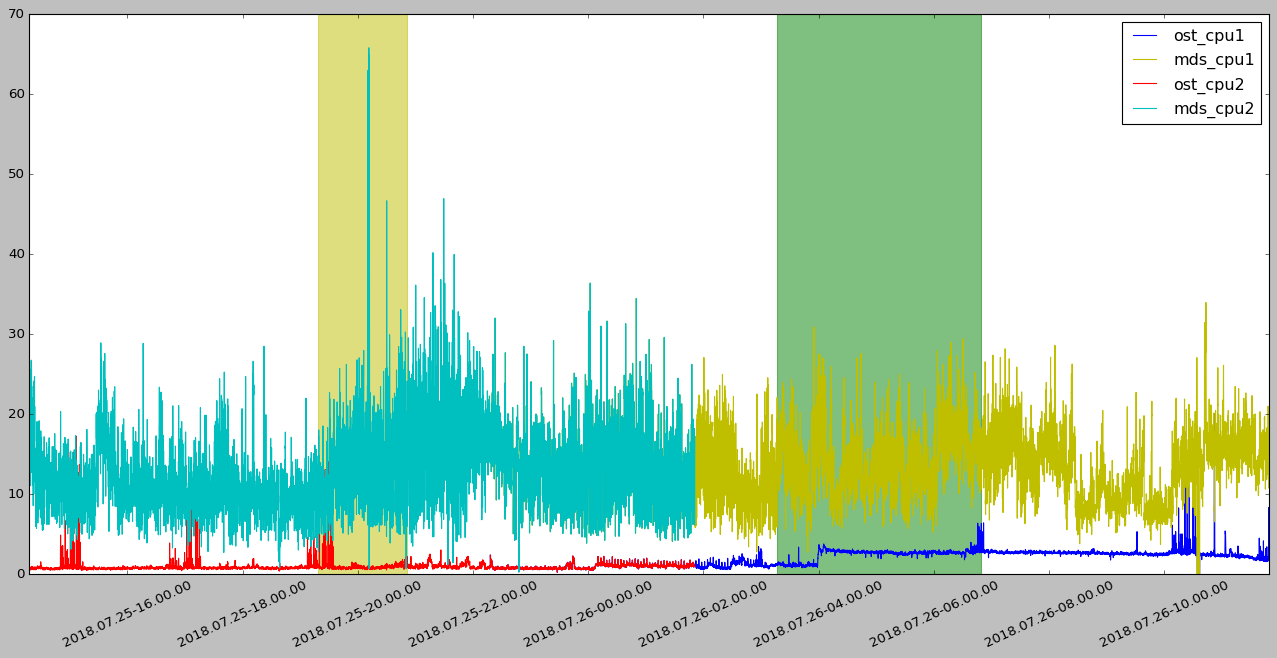

In [329]:
n1 = duration1 / 5
timestamps1=np.linspace(ts1, te1, n1)
print(len(timestamps1))
dates1=[dt.datetime.fromtimestamp(t, pytz.UTC) for t in timestamps1]
start_date1 = dt.datetime.fromtimestamp(start1, pytz.UTC)
end_date1 = dt.datetime.fromtimestamp(end1, pytz.UTC)
#dates
datenums1=md.date2num(dates1)

n2 = duration2 / 5
timestamps2=np.linspace(ts2, te2, n2)
print(len(timestamps2))
dates2=[dt.datetime.fromtimestamp(t, pytz.UTC) for t in timestamps2]
start_date2 = dt.datetime.fromtimestamp(start2, pytz.UTC)
end_date2 = dt.datetime.fromtimestamp(end2, pytz.UTC)
#dates
datenums2=md.date2num(dates2)
#values = list(one.values())
#values
plt.close()
plt.figure(figsize = (20, 10))
plt.subplots_adjust(bottom = 0.2)
plt.xticks(rotation = 25)
ax=plt.gca()
xfmt = md.DateFormatter('%Y.%m.%d-%H.%M.%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums1, ost_cpu_avg1, label = 'ost_cpu1', color = 'b')
plt.plot(datenums1, mds_cpu_avg1, label = 'mds_cpu1', color = 'y')
# plt.plot(datenums1, ost_wr_avg1, label = 'ost_wr', color = 'r')
# plt.plot(datenums1, ost_rr_avg1, label = 'ost_rr', color = 'c')

plt.plot(datenums2, ost_cpu_avg2, label = 'ost_cpu2', color = 'r')
plt.plot(datenums2, mds_cpu_avg2, label = 'mds_cpu2', color = 'c')
# plt.plot(datenums2, ost_wr_avg2, label = 'ost_wr', color = 'b')
# plt.plot(datenums2, ost_rr_avg2, label = 'ost_rr', color = 'y')

#plt.ylim(ymax=0.2e10,ymin=0)
plt.axvspan(start_date1, end_date1, color='g', alpha=0.5)
plt.axvspan(start_date2, end_date2, color='y', alpha=0.5)
plt.legend()
plt.show()

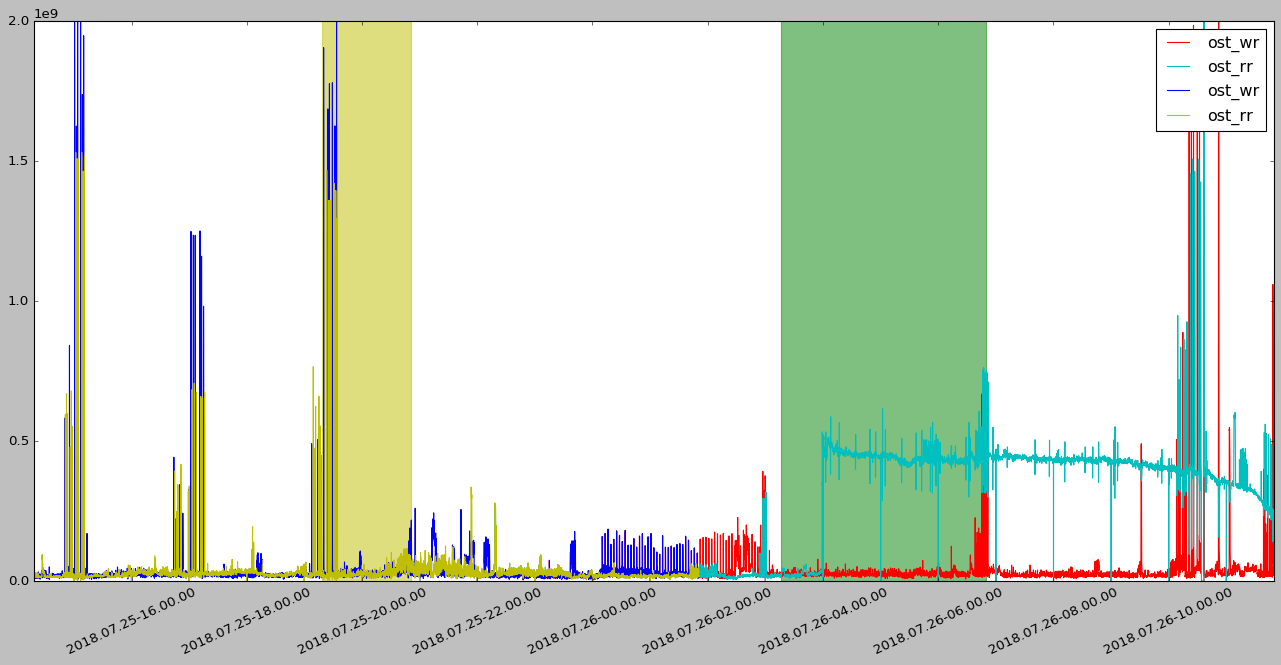

In [332]:
plt.close()
plt.figure(figsize = (20, 10))
plt.subplots_adjust(bottom = 0.2)
plt.xticks(rotation = 25)
ax=plt.gca()
xfmt = md.DateFormatter('%Y.%m.%d-%H.%M.%S')
ax.xaxis.set_major_formatter(xfmt)

# plt.plot(datenums1, ost_cpu_avg1, label = 'ost_cpu1', color = 'b')
# plt.plot(datenums1, mds_cpu_avg1, label = 'mds_cpu1', color = 'y')
plt.plot(datenums1, ost_wr_avg1, label = 'ost_wr', color = 'r')
plt.plot(datenums1, ost_rr_avg1, label = 'ost_rr', color = 'c')

# plt.plot(datenums2, ost_cpu_avg2, label = 'ost_cpu2', color = 'r')
# plt.plot(datenums2, mds_cpu_avg2, label = 'mds_cpu2', color = 'c')
plt.plot(datenums2, ost_wr_avg2, label = 'ost_wr', color = 'b')
plt.plot(datenums2, ost_rr_avg2, label = 'ost_rr', color = 'y')

plt.ylim(ymax=0.2e10,ymin=0)
plt.axvspan(start_date1, end_date1, color='g', alpha=0.5)
plt.axvspan(start_date2, end_date2, color='y', alpha=0.5)
plt.legend()
plt.show()

In [115]:
start = 1532994764.0
ts = start - 3600
end = 1532999692.0
te = end + 3600
duration = te - ts
# te = ts + 1800
ost_wr = get_lmt(ts, te, 'cscratch', 'writerates')
ost_rr = get_lmt(ts, te, 'cscratch', 'readrates')
ost_cpu = get_lmt(ts, te, 'cscratch', 'osscpu')
mds_cpu = get_lmt(ts, te, 'cscratch', 'mdscpu')

start get writerates data of cscratch from 2018-07-30 22:52:44 to 2018-07-31 02:14:52
start get readrates data of cscratch from 2018-07-30 22:52:44 to 2018-07-31 02:14:52
start get osscpu data of cscratch from 2018-07-30 22:52:44 to 2018-07-31 02:14:52
start get mdscpu data of cscratch from 2018-07-30 22:52:44 to 2018-07-31 02:14:52


In [116]:
ost_time = [float(timestamp) / 1000 for timestamp in ost_wr['snx11168-OST0000'].keys()]

In [117]:
duration

12128.0

In [118]:
ost_time[-1]-te

-2.0

In [119]:
ost0_wr = ost_wr['snx11168-OST0000']
ost0_rr = ost_rr['snx11168-OST0000']
ost0_wr = [-r for r in ost0_wr.values()]
ost0_rr = [r for r in ost0_rr.values()]

dates=[dt.datetime.fromtimestamp(t, pytz.UTC) for t in ost_time]
start_date = dt.datetime.fromtimestamp(start, pytz.UTC)
end_date = dt.datetime.fromtimestamp(end, pytz.UTC)
#dates
datenums=md.date2num(dates)

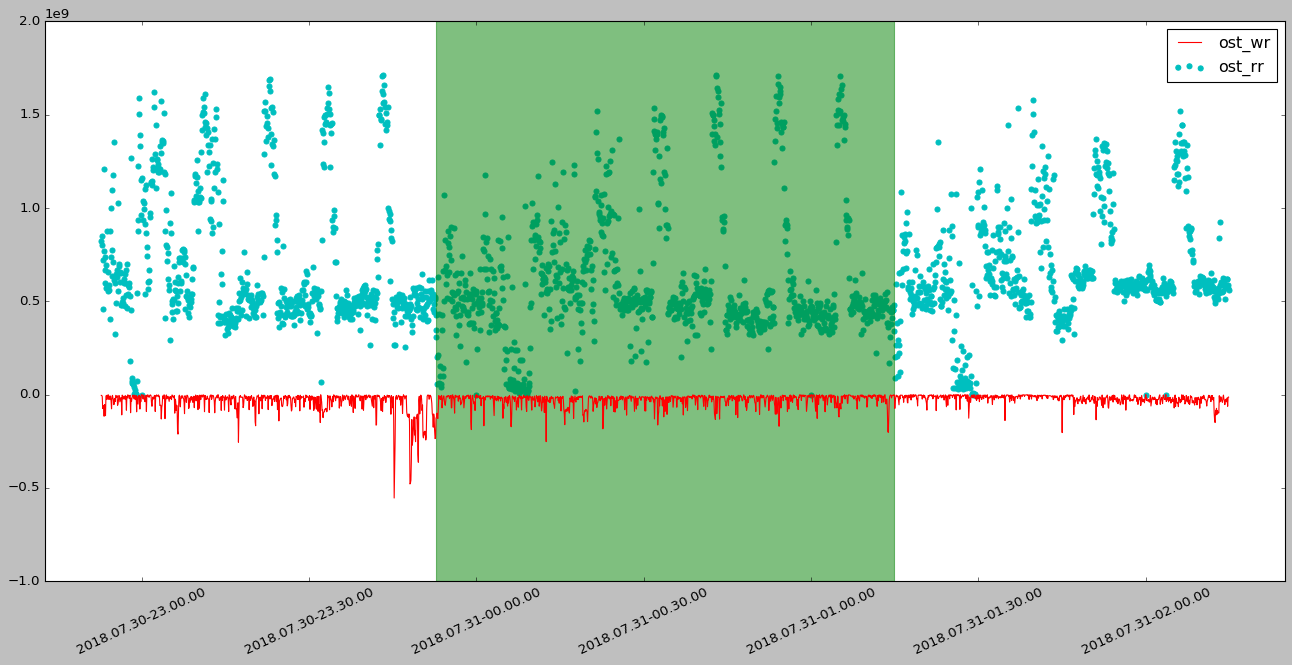

In [120]:
plt.close()
plt.figure(figsize = (20, 10))
plt.subplots_adjust(bottom = 0.2)
plt.xticks(rotation = 25)
ax=plt.gca()
xfmt = md.DateFormatter('%Y.%m.%d-%H.%M.%S')
ax.xaxis.set_major_formatter(xfmt)
# plt.plot(datenums1, ost_cpu_avg1, label = 'ost_cpu1', color = 'b')
# plt.plot(datenums1, mds_cpu_avg1, label = 'mds_cpu1', color = 'y')
plt.plot(datenums, ost0_wr, label = 'ost_wr', color = 'r')
plt.scatter(datenums, ost0_rr, label = 'ost_rr', color = 'c')

plt.axvspan(start_date, end_date, color='g', alpha=0.5)
plt.legend()
plt.show()

In [79]:
start = 1532989645.0
ts = start - 3600
end = 1532994764.0
te = end + 3600
duration = te - ts
# te = ts + 1800
ost_wr = get_lmt(ts, te, 'cscratch', 'writerates')
ost_rr = get_lmt(ts, te, 'cscratch', 'readrates')
ost_cpu = get_lmt(ts, te, 'cscratch', 'osscpu')
mds_cpu = get_lmt(ts, te, 'cscratch', 'mdscpu')

start get writerates data of cscratch from 2018-07-30 21:27:25 to 2018-07-31 00:52:44
start get readrates data of cscratch from 2018-07-30 21:27:25 to 2018-07-31 00:52:44
start get osscpu data of cscratch from 2018-07-30 21:27:25 to 2018-07-31 00:52:44
start get mdscpu data of cscratch from 2018-07-30 21:27:25 to 2018-07-31 00:52:44


In [105]:
ost_time = [float(timestamp) / 1000 for timestamp in ost_wr['snx11168-OST0000'].keys()]

ost0_wr = ost_wr['snx11168-OST0000']
ost0_rr = ost_rr['snx11168-OST0000']
ost0_wr = [-r for r in ost0_wr.values()]
ost0_rr = [r for r in ost0_rr.values()]

ost0_cpu = ost_cpu['snx11168n004']
mds0_cpu = mds_cpu['0']
ost0_cpu = [-r for r in ost0_cpu.values()]
mds0_cpu = [r for r in mds0_cpu.values()]

dates=[dt.datetime.fromtimestamp(t, pytz.UTC) for t in ost_time]
start_date = dt.datetime.fromtimestamp(start, pytz.UTC)
end_date = dt.datetime.fromtimestamp(end, pytz.UTC)
#dates
datenums=md.date2num(dates)

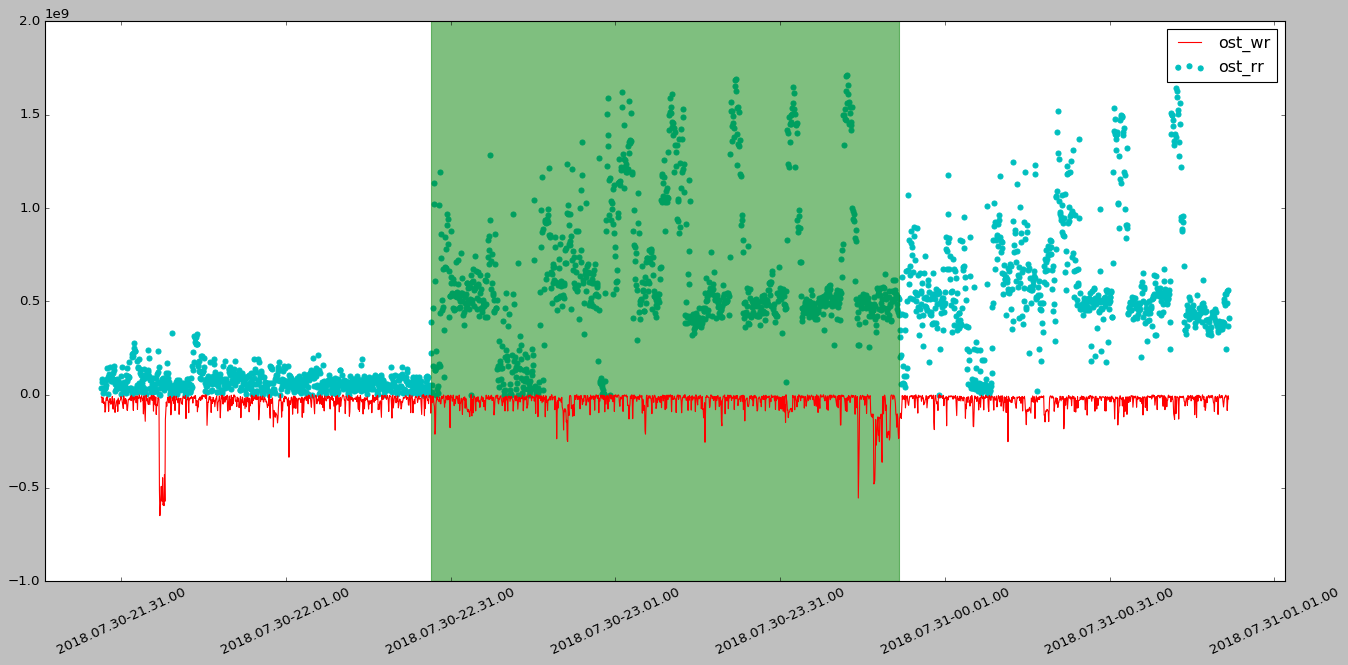

In [112]:
plt.close()
plt.figure(figsize = (20, 10))
plt.subplots_adjust(bottom = 0.2)
plt.xticks(rotation = 25)
ax=plt.gca()
xfmt = md.DateFormatter('%Y.%m.%d-%H.%M.%S')
ax.xaxis.set_major_formatter(xfmt)
# plt.plot(datenums1, ost_cpu_avg1, label = 'ost_cpu1', color = 'b')
# plt.plot(datenums1, mds_cpu_avg1, label = 'mds_cpu1', color = 'y')
plt.plot(datenums, ost0_wr, label = 'ost_wr', color = 'r')
plt.scatter(datenums, ost0_rr, label = 'ost_rr', color = 'c')

plt.axvspan(start_date, end_date, color='g', alpha=0.5)
plt.legend()
plt.show()

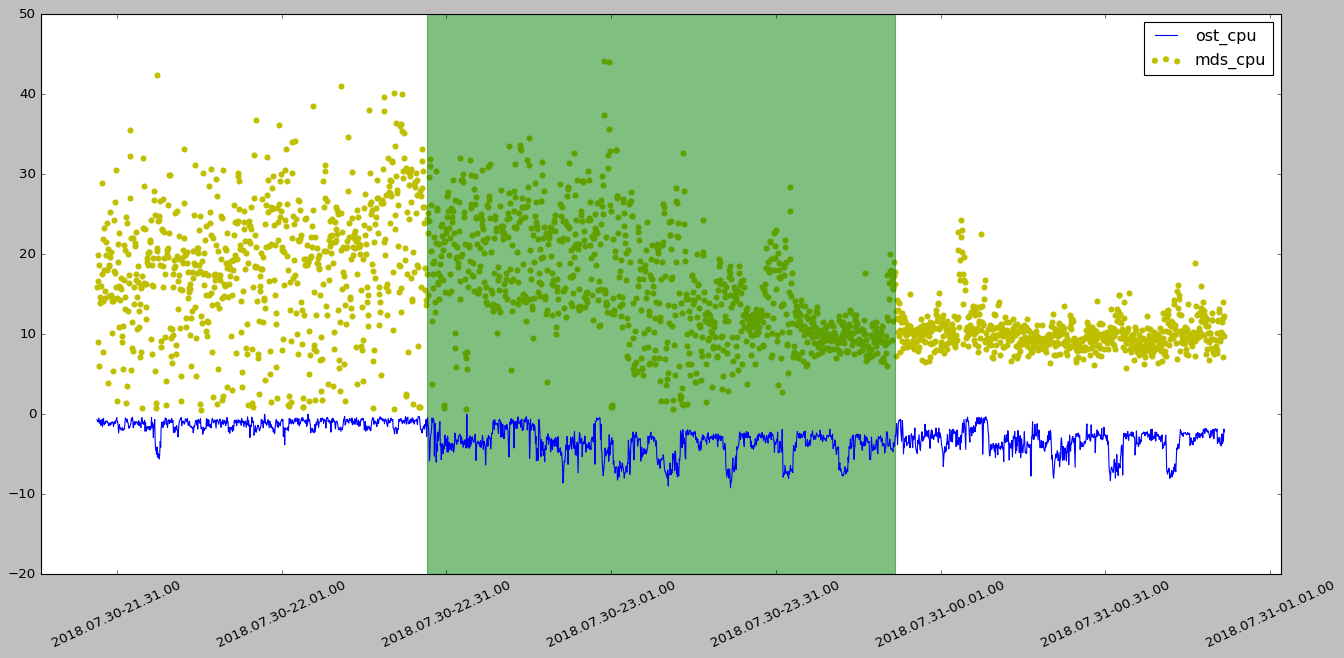

In [111]:
plt.close()
plt.figure(figsize = (20, 10))
plt.subplots_adjust(bottom = 0.2)
plt.xticks(rotation = 25)
ax=plt.gca()
xfmt = md.DateFormatter('%Y.%m.%d-%H.%M.%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums, ost0_cpu, label = 'ost_cpu', color = 'b')
plt.scatter(datenums, mds0_cpu, label = 'mds_cpu', color = 'y')
# plt.plot(datenums, ost0_wr, label = 'ost_wr', color = 'r')
# plt.plot(datenums, ost0_rr, label = 'ost_rr', color = 'c')

plt.axvspan(start_date, end_date, color='g', alpha=0.5)
plt.legend()
plt.show()